# importing the dependencies

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re

In [2]:
# fetching dataset
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# EDA

In [3]:
# checking the shape (# of rows and columns) of the datasets
print('DF Shape: ', df.shape)

DF Shape:  (8128, 13)


In [4]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [5]:
#Missing value
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

<Axes: >

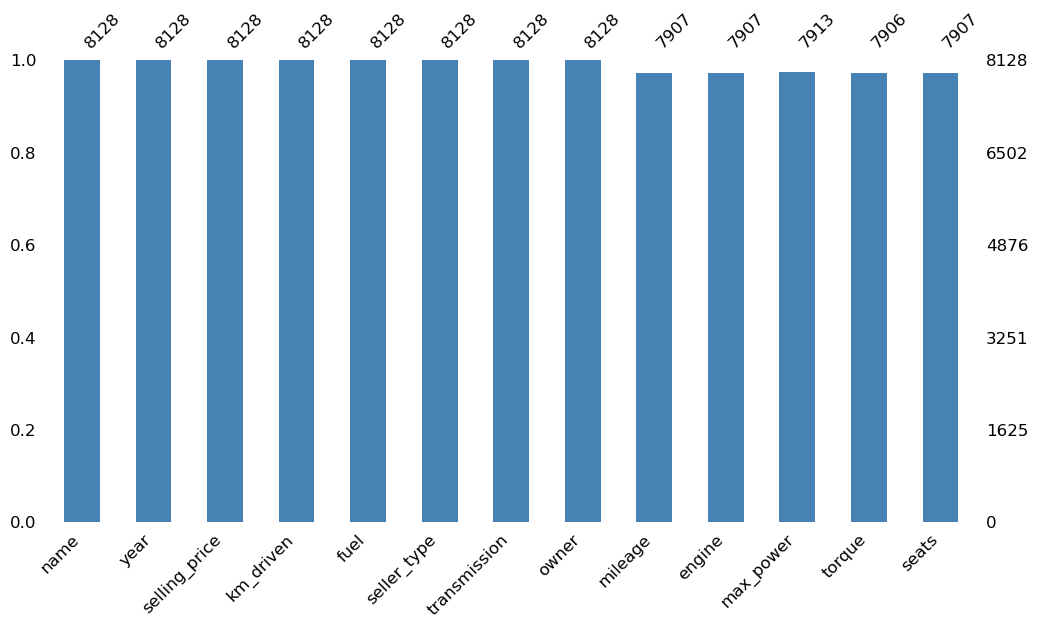

In [6]:
import missingno as msno
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

In [7]:
len(df), len(df.dropna())

(8128, 7906)

In [8]:
#deleting missing values rows
df = df.dropna()

In [9]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [10]:
counts = df.nunique()
counts

name             1982
year               27
selling_price     670
km_driven         898
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
torque            441
seats               9
dtype: int64

## year-wise count of EV models

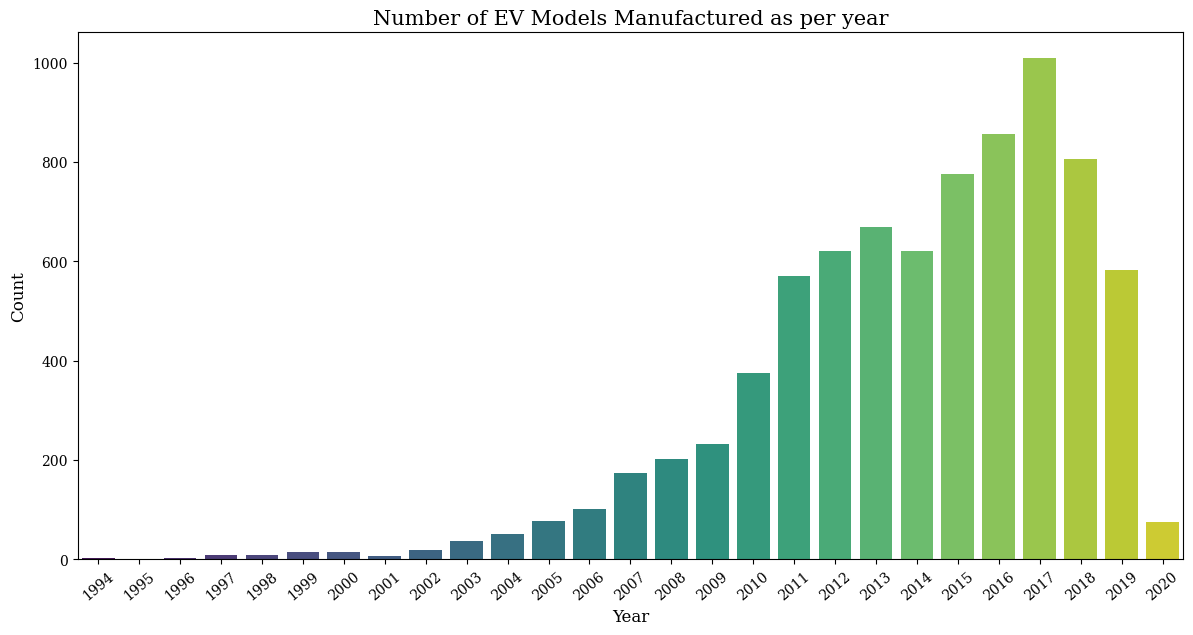

In [12]:

sns.catplot(data=df, x='year', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Year',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured as per year', family='serif', size=15)
plt.show()

## different body types EVs visualization from dataset

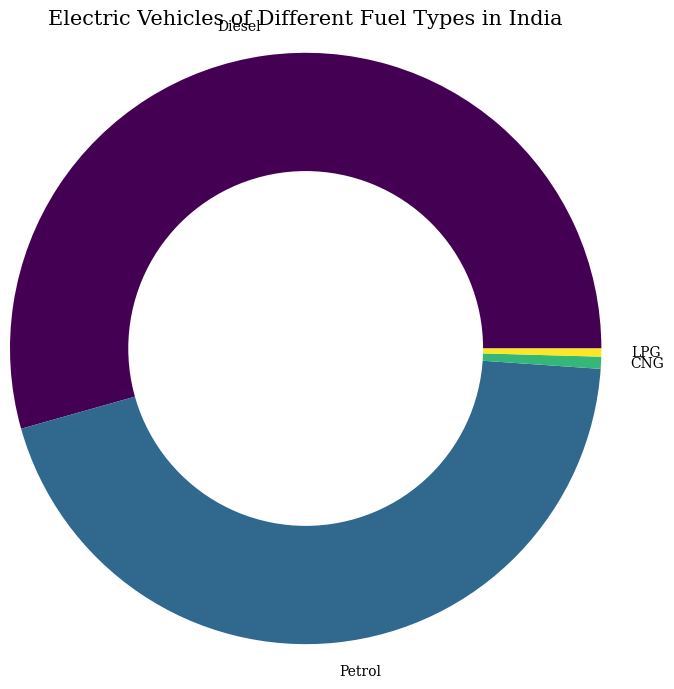

In [13]:

x = df['fuel'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Fuel Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

## Electric Vehicles of Different Seller_type in India

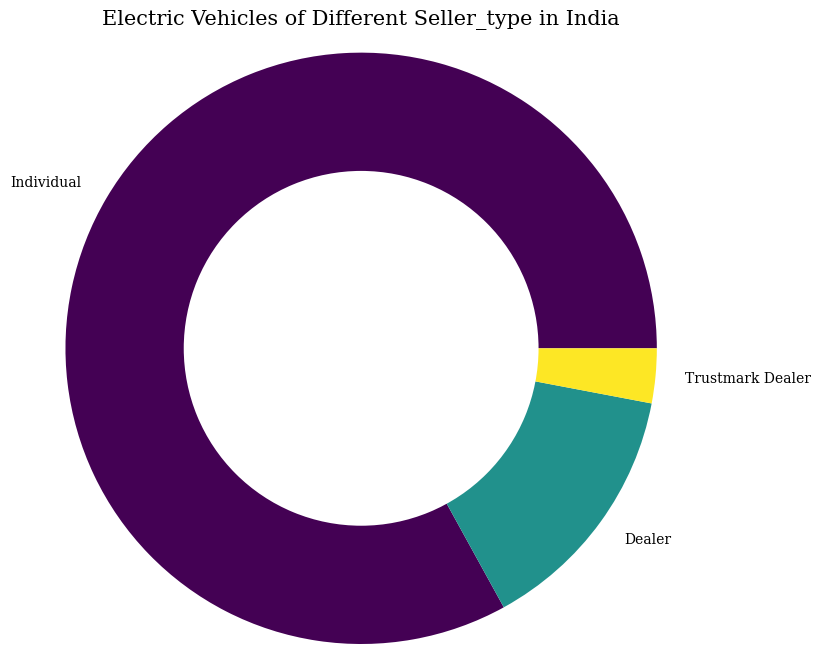

In [14]:
x = df['seller_type'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Seller_type in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

## EVs of different number of seats from dataset

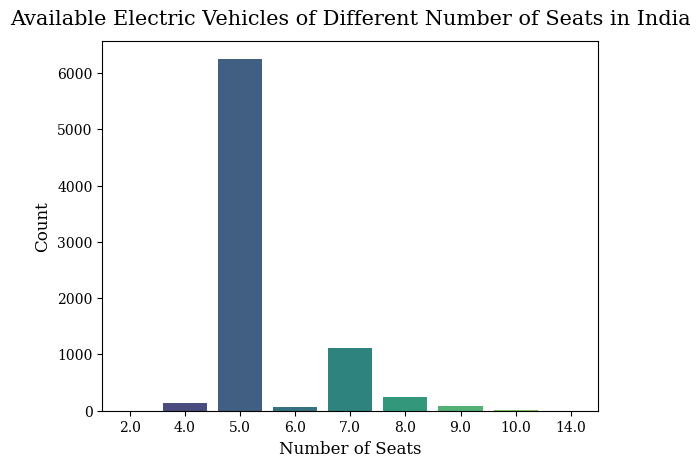

In [15]:

sns.countplot(data=df, x='seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

## year-wise analysis of the number of seats

C:\Users\Darshan\AppData\Local\Temp\ipykernel_16088\956166489.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df, x='year', y='seats', palette='viridis', ci=None, height=6, aspect=2)


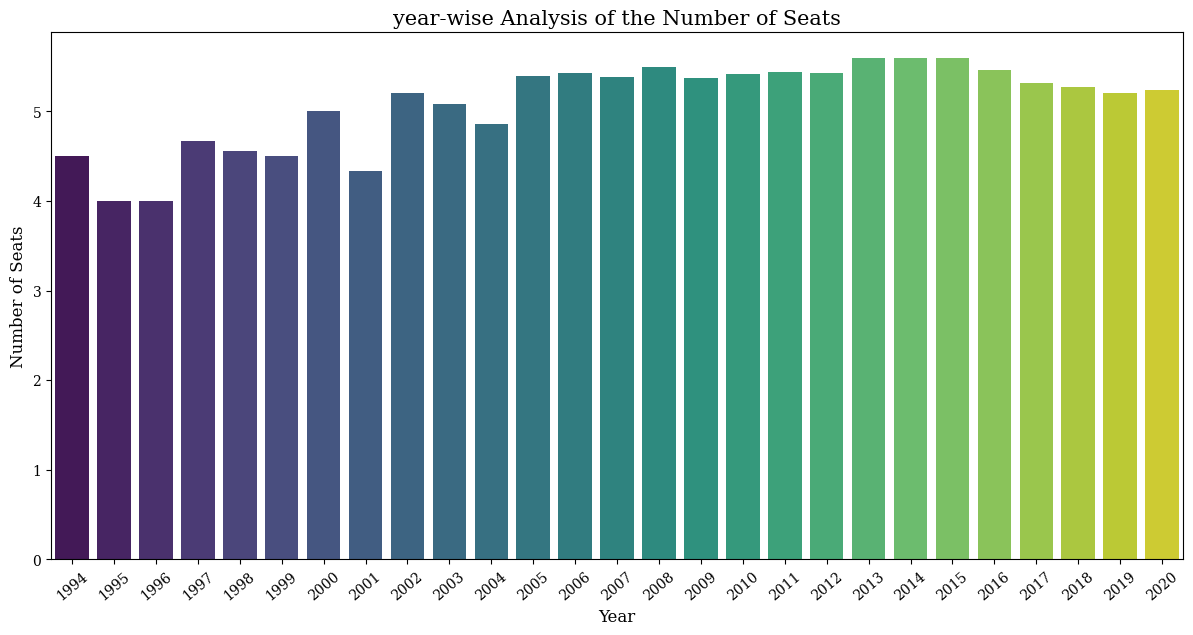

In [16]:

sns.catplot(kind='bar', data=df, x='year', y='seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Year',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('year-wise Analysis of the Number of Seats', family='serif', size=15);

## owner types visualization from dataset

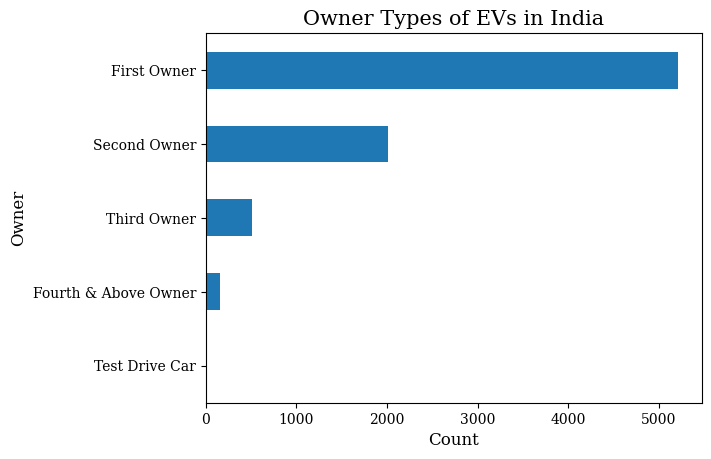

In [17]:
# owner types visualization from dataset
df['owner'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Owner', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Owner Types of EVs in India', family='serif', size=15)
plt.show()

## retail outlets visualization from dataset

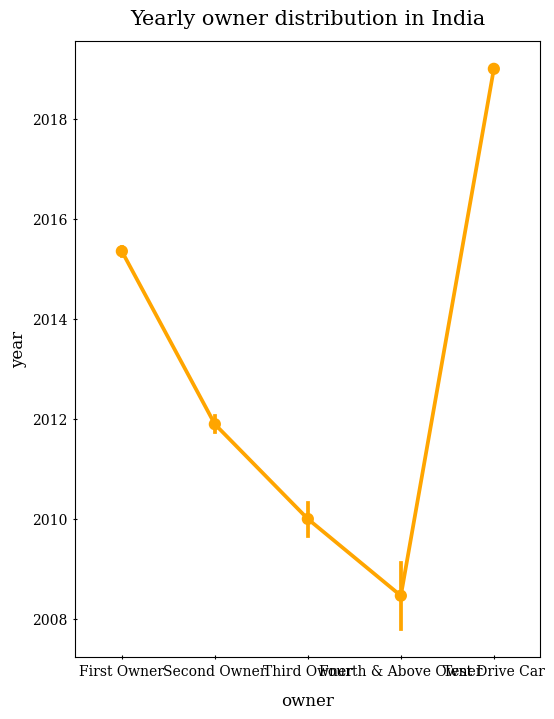

In [23]:

plt.figure(figsize=(6, 8))
sns.pointplot(data=df, y='year', x='owner', color='orange')
plt.xlabel('owner', family='serif', size=12, labelpad=10)
plt.ylabel('year', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Yearly owner distribution in India', weight=200, family='serif', size=15, pad=12)
plt.show()

## km_driven visualization from dataset

C:\Users\Darshan\AppData\Local\Temp\ipykernel_16088\1971664786.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='fuel', x='km_driven', ci=None, palette='viridis')


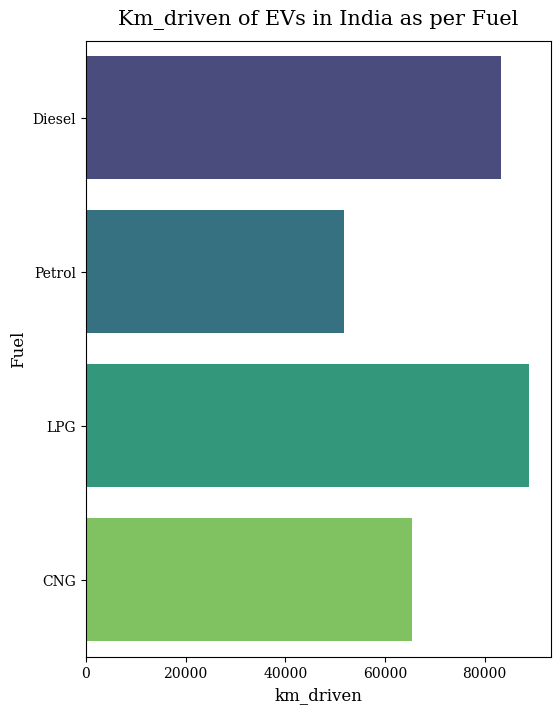

In [24]:
# km_driven visualization from dataset
plt.figure(figsize=(6, 8))
sns.barplot(data=df, y='fuel', x='km_driven', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('km_driven', family='serif', size=12)
plt.ylabel('Fuel', family='serif', size=12)
plt.title(label='Km_driven of EVs in India as per Fuel', family='serif', size=15, pad=12)
plt.show()

In [155]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
df = df.astype({'seats':str})
# remove '.0' left from float data type 
df['seats'] = df['seats'].str.replace('.0','', regex=False).replace({'nan':np.nan})
df.dtypes['seats']

dtype('O')

In [12]:
df['torque'].dropna().head(20)

0               190Nm@ 2000rpm
1          250Nm@ 1500-2500rpm
2        12.7@ 2,700(kgm@ rpm)
3     22.4 kgm at 1750-2750rpm
4        11.5@ 4,500(kgm@ rpm)
5            113.75nm@ 4000rpm
6         7.8@ 4,500(kgm@ rpm)
7                59Nm@ 2500rpm
8          170Nm@ 1800-2400rpm
9               160Nm@ 2000rpm
10              248Nm@ 2250rpm
11               78Nm@ 4500rpm
12              190Nm@ 2000rpm
14               84Nm@ 3500rpm
15         115Nm@ 3500-3600rpm
16              200Nm@ 1750rpm
17    22.4 kgm at 1750-2750rpm
18               62Nm@ 3000rpm
19       219.7Nm@ 1500-2750rpm
20              160Nm@ 2000rpm
Name: torque, dtype: object

In [13]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def split_torque(row):
    """
    Splits 'torque' value in a row and creates 4 new fields: 
    > 'torque_val' - value of car max torque;
    > 'torque_unit' - unit of value in 'torque_val';
    > 'torque_eng_sp_val' - value of engine speed at which car max torque is reached;
    > 'torque_eng_sp_unit' - unit of value in 'torque_eng_sp_val';
    """
    torque_val, torque_unit, torque_eng_sp_val, torque_eng_sp_unit = np.nan, np.nan, np.nan, np.nan
    
    # skip null values
    if row['torque'] is np.nan:
        return torque_val, torque_unit, torque_eng_sp_val, torque_eng_sp_unit
        
    # clear torque value from ',' and tailing ')', split and save in temporary list
    temp = re.split(
        '\(11.2\)@ |\(38.7kgm\)@ |\+\/-500r|\+\/-500\(N|  N| N| r|N|@ r|@ |  r|r|\(k|\(| at |n|-|~| k|k| \/ | \/|\s',
        str(row['torque']).replace(',','').strip(' \)')
    )
    
    # first element of split should be number, helps find cases that should be added in the logic of code
    if is_number(temp[0]):
        torque_val = float(temp[0])
    else:
        print('>>> Error_1:', temp, '\n\n', row, '\n\n\n')
     
    try:
        if is_number(temp[1]):
            torque_eng_sp_val = float(temp[1])
            if len(temp) == 2:
                torque_unit = 'Nm'
                torque_eng_sp_unit = 'rpm'
            elif len(temp) > 2:
                if is_number(temp[2]):
                    torque_eng_sp_val = (float(temp[1])+float(temp[2]))/2
                    torque_unit = 'Nm'
                    torque_eng_sp_unit = 'rpm'
                else:
                    torque_unit = temp[2]
                    torque_eng_sp_unit = temp[3]
        elif len(temp) == 2:
            torque_unit = temp[1]
        elif len(temp) == 3:
            torque_unit = temp[1]
            torque_eng_sp_val = float(temp[2])
            torque_eng_sp_unit = 'rpm'
        elif len(temp) == 4:
            if is_number(temp[3]):
                torque_eng_sp_val = (float(temp[2])+float(temp[3]))/2
                torque_eng_sp_unit = 'rpm'
                torque_unit = temp[1]
            else:
                torque_unit = temp[1]
                torque_eng_sp_val = float(temp[2])
                torque_eng_sp_unit = temp[3]
        elif len(temp) == 5:
            torque_unit = temp[1]
            torque_eng_sp_val = (float(temp[2])+float(temp[3]))/2
            torque_eng_sp_unit = temp[4]
        # else statement helps find cases that should be added in the logic of code
        else:
            print('>>> Error_2:', temp, '\n\n', row, '\n\n\n')
        
        return torque_val, torque_unit, torque_eng_sp_val, torque_eng_sp_unit
    # in case some error is raised during assigning new values, helps find cases that should be added in the logic of code
    except:
        print('>>> Error_3:', temp, '\n\n', row, '\n\n\n')
        
def parse_torque(df):
    data = df.copy()
    
    # split torque
    torque_new_cols = ['torque_val', 'torque_unit', 'torque_eng_sp_val', 'torque_eng_sp_unit']
    data[torque_new_cols] = data.apply(split_torque, axis=1, result_type="expand")
    
    # fix units after spliting
    data['torque_unit'] = data['torque_unit'].replace({
        'm': 'nm',
        'gm': 'kgm',
        'Nm': 'nm',
        'KGM': 'kgm',
        'M': 'nm'
    })
    data['torque_eng_sp_unit'] = data['torque_eng_sp_unit'].replace({
        'pm': 'rpm',
        'RPM': 'rpm'
    })
    
    return data

In [14]:
df = parse_torque(df)
df[['torque', 'torque_val', 'torque_unit', 'torque_eng_sp_val', 'torque_eng_sp_unit']].head()

,torque,torque_val,torque_unit,torque_eng_sp_val,torque_eng_sp_unit
0,190Nm@ 2000rpm,190.0,nm,2000.0,rpm
1,250Nm@ 1500-2500rpm,250.0,nm,2000.0,rpm
2,"12.7@ 2,700(kgm@ rpm)",12.7,kgm,2700.0,rpm
3,22.4 kgm at 1750-2750rpm,22.4,kgm,2250.0,rpm
4,"11.5@ 4,500(kgm@ rpm)",11.5,kgm,4500.0,rpm


In [15]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_val,torque_unit,torque_eng_sp_val,torque_eng_sp_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,190.00,nm,2000.0,rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,250.00,nm,2000.0,rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,12.70,kgm,2700.0,rpm
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,22.40,kgm,2250.0,rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,11.50,kgm,4500.0,rpm
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5,113.75,nm,4000.0,rpm
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5,7.80,kgm,4500.0,rpm
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4,59.00,nm,2500.0,rpm
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5,170.00,nm,2100.0,rpm
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5,160.00,nm,2000.0,rpm


In [16]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'torque_val', 'torque_unit', 'torque_eng_sp_val',
       'torque_eng_sp_unit'],
      dtype='object')

In [17]:
df.rename(columns = {'torque_val':'torque_nm'}, inplace=True)
df.rename(columns = {'torque_eng_sp_val':'torque_rpm'}, inplace=True)

In [18]:
# Remove column name 'torque'
df = df.drop(['torque'], axis=1)

In [19]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque_nm', 'torque_unit', 'torque_rpm', 'torque_eng_sp_unit'],
      dtype='object')

In [20]:
# Remove column name 'torque_nm,torque_rpm'
df=df.drop(['torque_unit','torque_eng_sp_unit'], axis=1)

In [21]:
# Replacing km values from the dataset
df[['mileage','engine','max_power','seats']] = df[['mileage','engine','max_power','seats']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [22]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.00,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5,12.70,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5,22.40,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5,11.50,4500.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,113.75,4000.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,5,7.80,4500.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,4,59.00,2500.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,5,170.00,2100.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399,68.1,5,160.00,2000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  seats          7906 non-null   object 
 12  torque_nm      7906 non-null   float64
 13  torque_rpm     7872 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 926.5+ KB


In [24]:
df['mileage'] = df['mileage'].astype(str).astype(float)
df['engine'] = df['engine'].astype(str).astype(int)
df['max_power'] = df['max_power'].astype(str).astype(float)
df['seats'] = df['seats'].astype(str).astype(int)

## owner visualization from dataset

C:\Users\Darshan\AppData\Local\Temp\ipykernel_26232\4234494277.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='owner', y='seats', ci=None, palette='viridis')


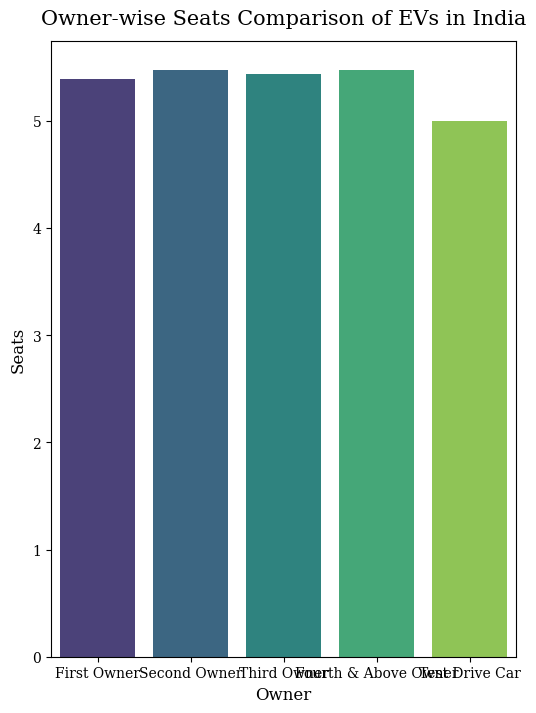

In [175]:

plt.figure(figsize=(6, 8))
sns.barplot(data=df, x='owner', y='seats', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Owner',family='serif', size=12)
plt.ylabel('Seats',family='serif', size=12)
plt.title(label='Owner-wise Seats Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

## plotting the correlation matrix from dataset

C:\Users\Darshan\AppData\Local\Temp\ipykernel_21560\2247260391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


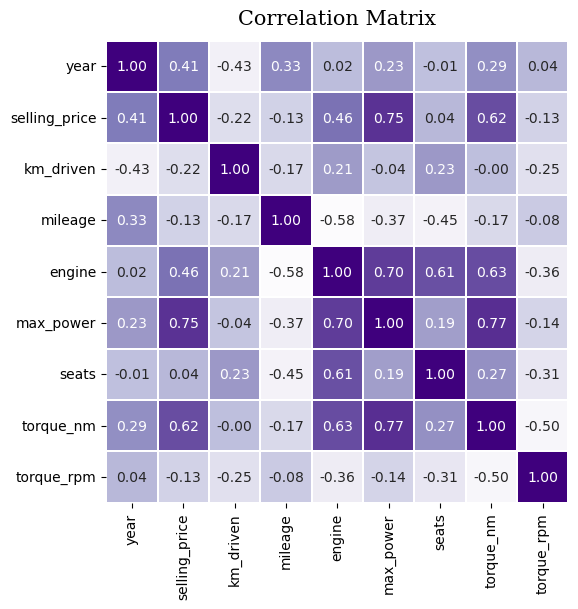

In [25]:

plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

In [177]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.00,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,12.70,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,22.40,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,11.50,4500.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,113.75,4000.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061,57.50,5,7.80,4500.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,4,59.00,2500.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,5,170.00,2100.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,5,160.00,2000.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int32  
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   int32  
 12  torque_nm      7906 non-null   float64
 13  torque_rpm     7872 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(5)
memory usage: 864.7+ KB


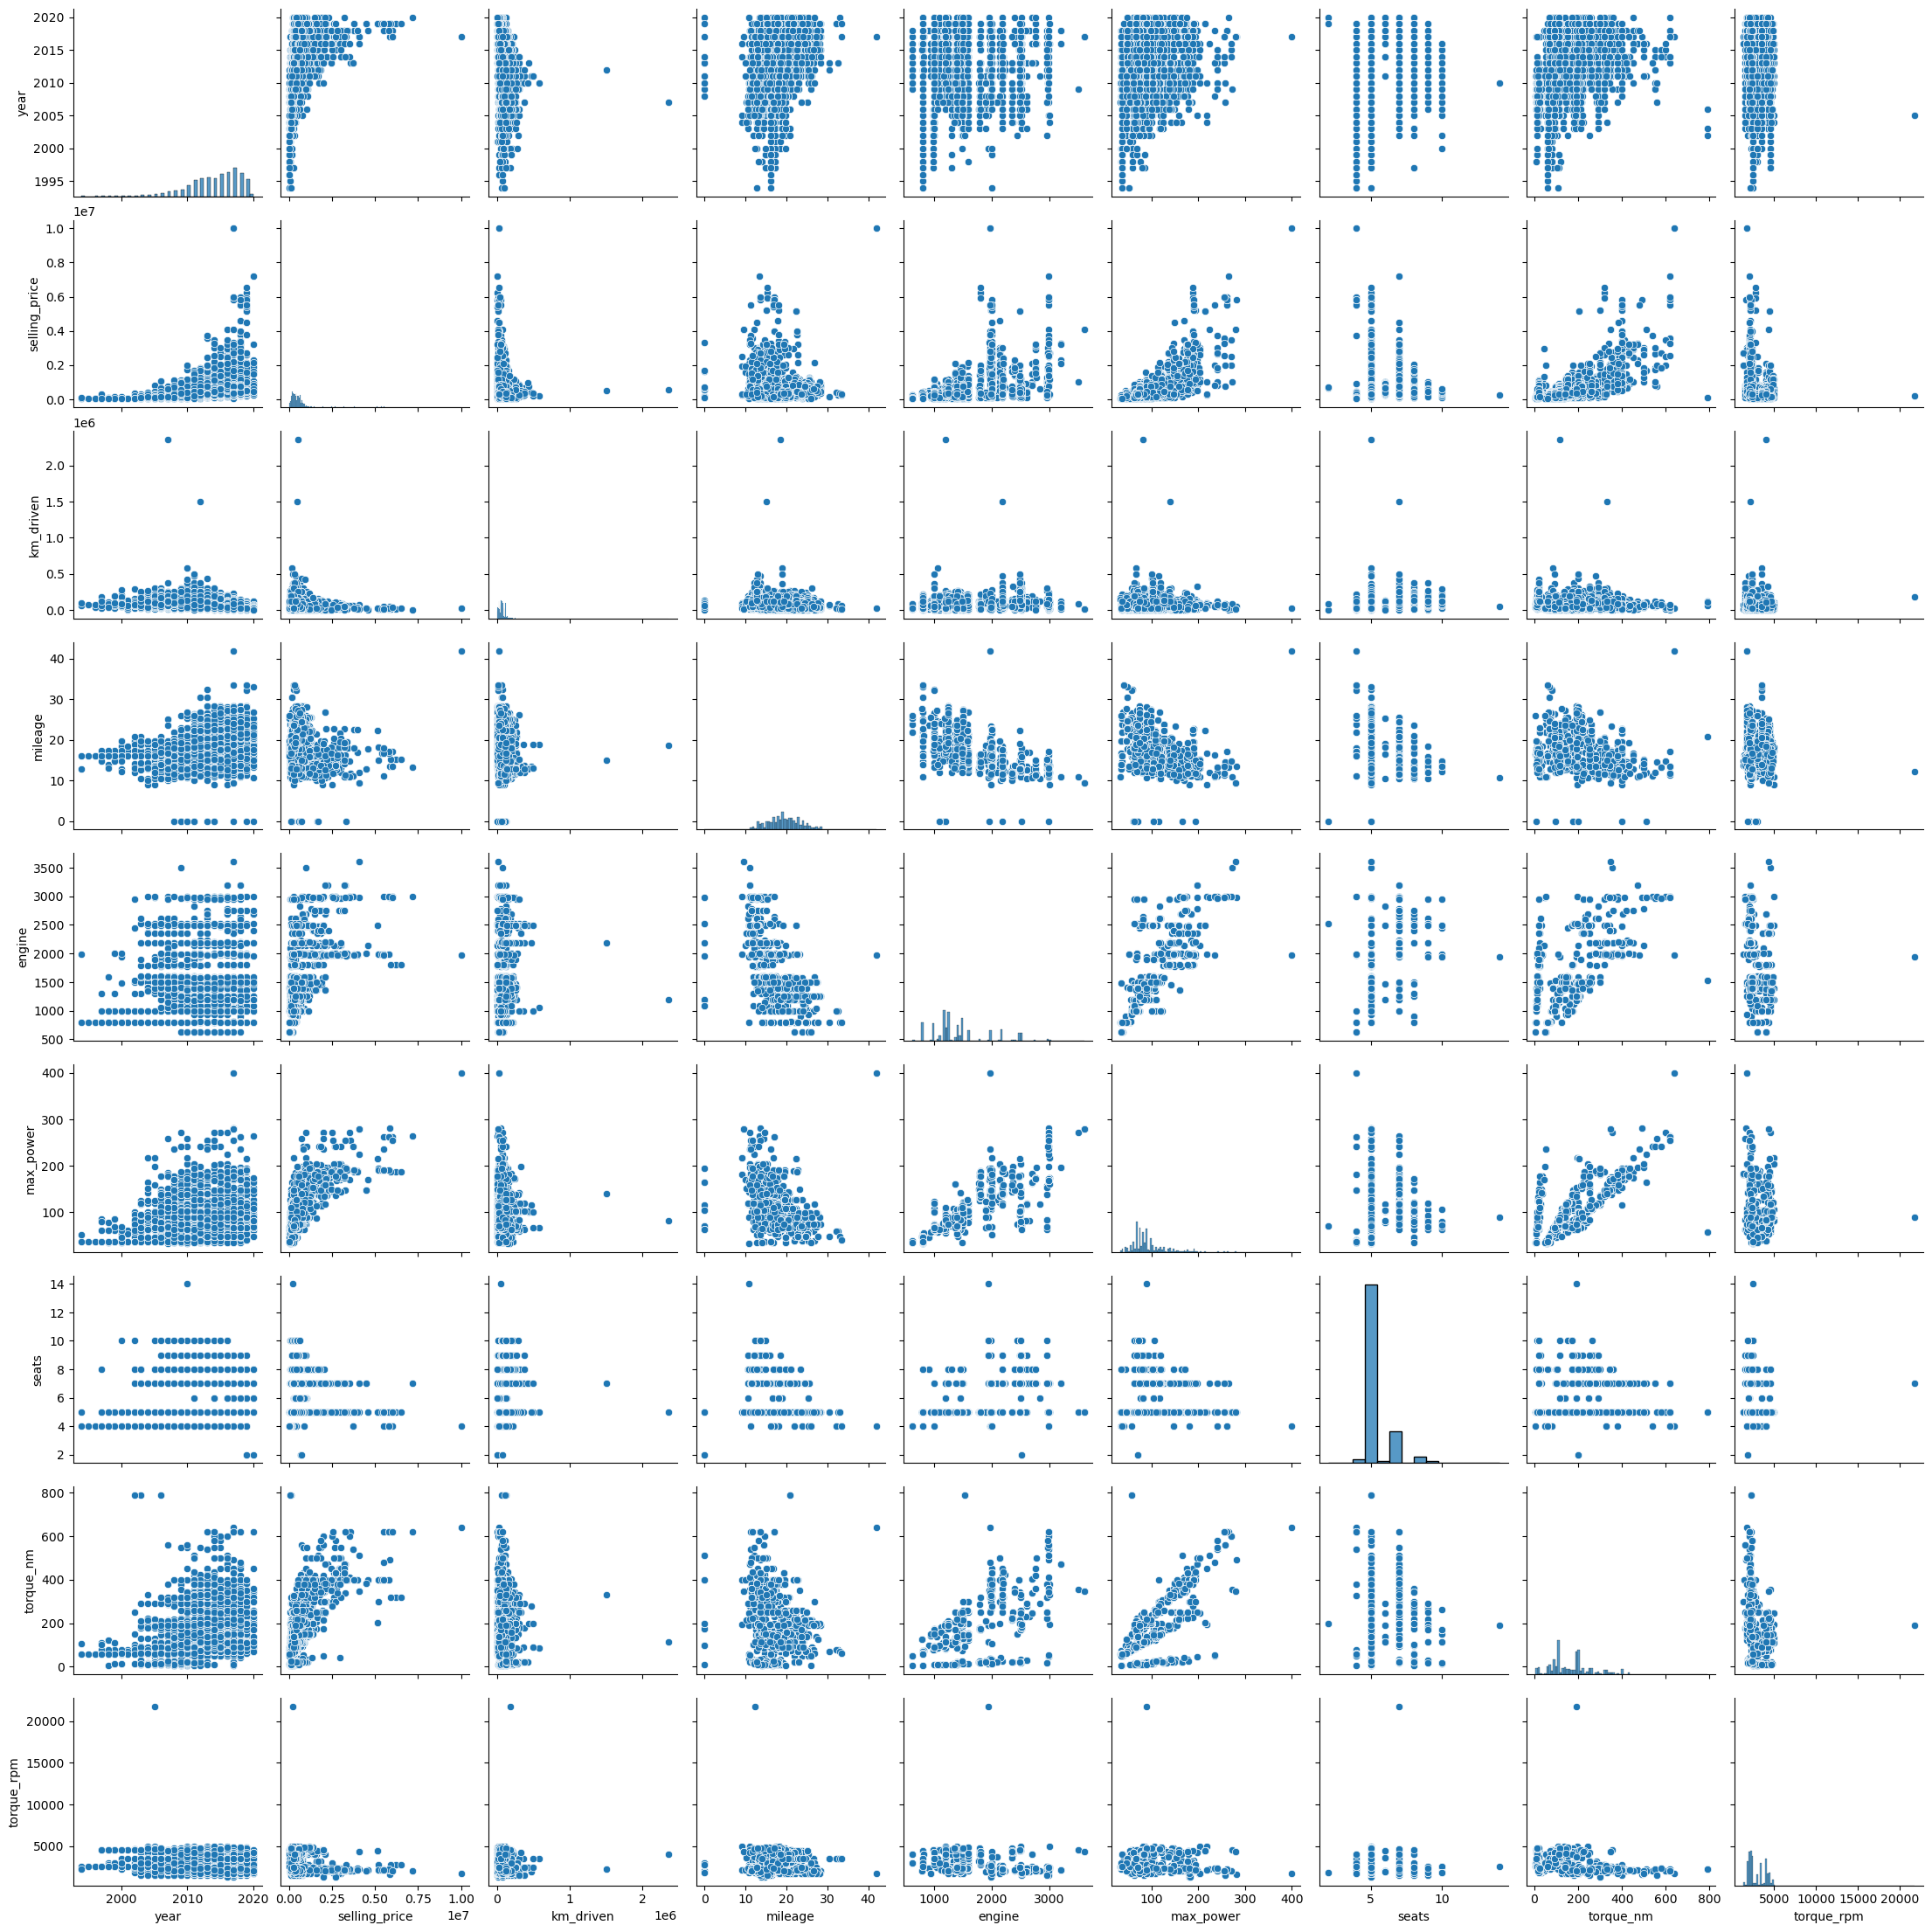

In [180]:
sns.pairplot(df)
plt.show()

In [181]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [182]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [183]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [184]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [26]:
# encoding the categorical features

# fuel feature
df['fuel'].replace(to_replace=['Diesel', 'Petrol', 'LPG', 'CNG'],value=[0, 1, 2, 3],inplace=True)

# seller_type feature
df['seller_type'].replace(to_replace=['Individual', 'Dealer', 'Trustmark Dealer'],value=[0, 1, 2],inplace=True)

# transmission feature
df['transmission'].replace(to_replace=['Manual', 'Automatic'],value=[0, 1],inplace=True)

# owner feature
df['owner'].replace(to_replace=['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner', 'Test Drive Car'],value=[0, 1, 2, 3, 4],inplace=True)


In [27]:
df.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0,0,18.50,1197,82.85,5,113.7,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,0,3,16.80,1493,110.00,5,24.0,2325.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,0,0,0,19.30,1248,73.90,5,190.0,2000.0
8126,Tata Indigo CR4,2013,290000,25000,0,0,0,0,23.57,1396,70.00,5,140.0,2400.0
8127,Tata Indigo CR4,2013,290000,25000,0,0,0,0,23.57,1396,70.00,5,140.0,2400.0


In [28]:
#deleting missing values rows
df = df.dropna()

In [29]:
# selecting features for building a model
X = df[['year','selling_price','km_driven','fuel', 'seller_type', 'transmission', 'owner', 'mileage','engine','max_power','seats','torque_nm','torque_rpm']]

In [30]:
X

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
0,2014,450000,145500,0,0,0,0,23.40,1248,74.00,5,190.0,2000.0
1,2014,370000,120000,0,0,0,1,21.14,1498,103.52,5,250.0,2000.0
2,2006,158000,140000,1,0,0,2,17.70,1497,78.00,5,12.7,2700.0
3,2010,225000,127000,0,0,0,0,23.00,1396,90.00,5,22.4,2250.0
4,2007,130000,120000,1,0,0,0,16.10,1298,88.20,5,11.5,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,0,0,0,18.50,1197,82.85,5,113.7,4000.0
8124,2007,135000,119000,0,0,0,3,16.80,1493,110.00,5,24.0,2325.0
8125,2009,382000,120000,0,0,0,0,19.30,1248,73.90,5,190.0,2000.0
8126,2013,290000,25000,0,0,0,0,23.57,1396,70.00,5,140.0,2400.0


In [31]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Segmentation using PCA

In [32]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.269811,0.794137,-1.775826,0.435442,0.371718,1.235911,-0.012012,-0.098842,0.043293,-0.098481,-0.093452,0.096725,0.100051
1,0.511944,1.204104,-1.045138,1.012065,-0.251941,0.251574,0.331127,0.383686,-0.595024,-0.168940,-0.170483,-0.106837,-0.047921
2,-1.871022,2.248932,1.737125,1.520606,0.083537,-0.150240,0.290234,-0.003645,0.715398,-0.054607,0.265821,-0.794088,-0.291982
3,-0.994105,1.102914,-0.925301,0.427221,0.576169,1.048194,-0.623538,-0.257888,0.570309,0.318689,1.154811,-0.193327,-0.763005
4,-2.025988,0.549888,2.037301,-0.284511,0.234071,1.383366,-0.909513,0.323402,0.331285,0.416190,0.604935,0.262058,-0.288319


C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darshan\anaconda3\lib\site-packages\skl

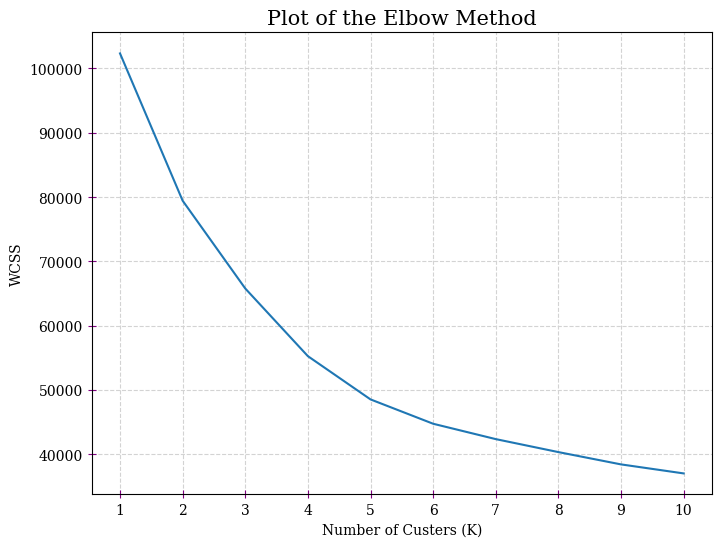

In [33]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [34]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

C:\Users\Darshan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [35]:
# check the labels assigned to each data point
print(kmean.labels_)

[3 3 0 ... 3 3 3]


In [36]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    3488
3    2668
2    1178
1     538
dtype: int64

In [37]:
# adding a new feature of cluster labels to the dataset 3
df['clusters'] = kmean.labels_

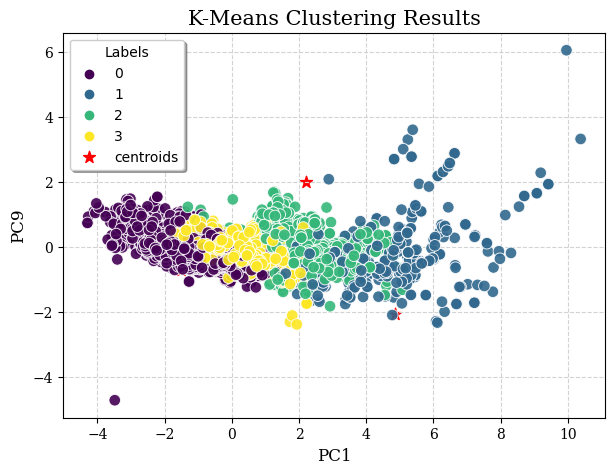

In [38]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

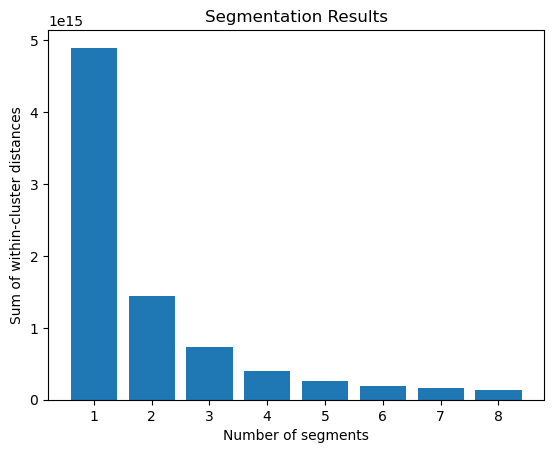

In [39]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(X)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

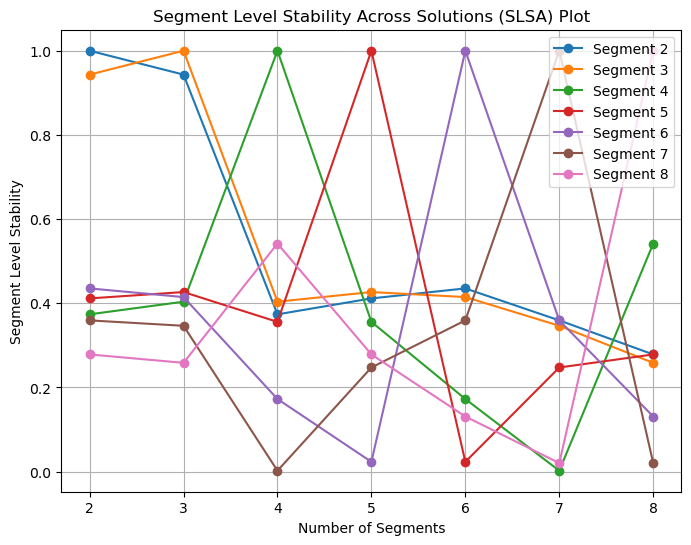

In [42]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(X)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()
